<a href="https://colab.research.google.com/github/balukalluri999/Explainable-Ai-with-face-recognition/blob/main/Lime_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import gray2rgb, rgb2gray # since the code wants color images
#from skimage.util.montage import montage2d# to make a nice montage of the images

In [ ]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

# Load LFW dataset
faces= fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [ ]:
import numpy as np
from skimage.color import gray2rgb
from sklearn.datasets import fetch_lfw_people

# Load the LFW dataset
lfw_people = fetch_lfw_people(data_home=None, funneled=True, resize=0.5,
                              min_faces_per_person=70, color=True,
                              slice_=(slice(61, 189), slice(61, 189)))
X_vec = lfw_people.images
y_vec = lfw_people.target.astype(np.uint8)


In [ ]:
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
def reshapeDataset(dataset, newWidth, newHeight,):

  imgs = []
  for data in dataset:
      img = Image.fromarray((data * 255).astype(np.uint8)).resize((newWidth, newHeight))
      img = np.array(img)
      imgs.append(np.asarray(img))

  return np.array(imgs)

In [ ]:
X_vec = reshapeDataset(X_vec, 224, 224)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_vec,
                                                    train_size=0.70)

In [ ]:
# fix the random seed for reproducibility
seed = 123
np.random.seed(seed)

# configuration
batch_size = 32
nb_classes = 40
nb_epoch = 50
# image dimensions
img_rows, img_cols = 224, 224
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

In [ ]:
!pip install

ERROR: You must give at least one requirement to install (see "pip help install")


In [ ]:
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56439 sha256=fc1f34e53b016fae01439c9212574e27ff5ed3b557357dbb476ebd3e2ae5c203
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
import cv2
import numpy as np
import os
from skimage import io
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, MaxPool2D, AveragePooling2D
from tensorflow.keras.utils import to_categorical
from keras import backend as K
from PIL import Image
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization


In [ ]:
# reshape the data matrix
if K.image_data_format() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 3, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 3, img_rows, img_cols)

    input_shape = (3, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)

    input_shape = (img_rows, img_cols, 3)


In [ ]:
# scale the data
X_train = X_train.astype('double')
X_test = X_test.astype('double')

X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


X_train shape: (901, 224, 224, 3)
901 train samples
387 test samples


In [ ]:
# one-hot encoding for the class label
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

(0.0, 1.0, 0.0, 1.0)

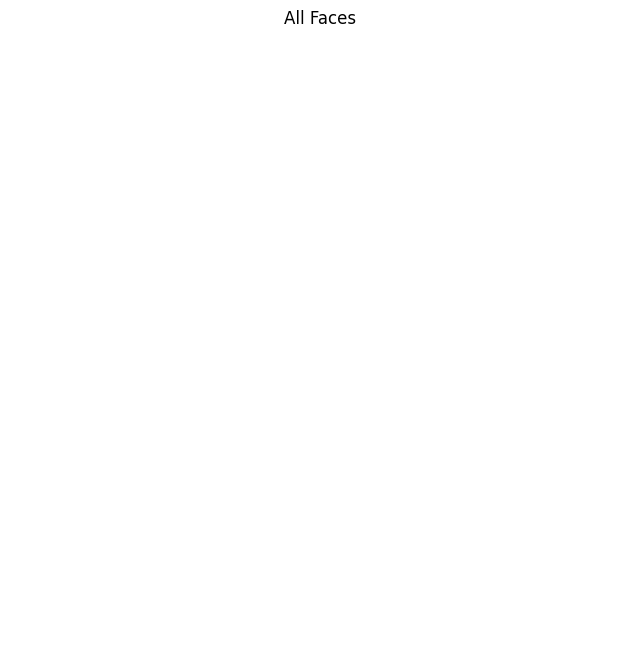

In [ ]:
%matplotlib inline
fig, ax1 = plt.subplots(1,1, figsize = (8,8))
#ax1.imshow(montage2d(X_vec[:,:,:,0]), cmap='gray', interpolation = 'none')
ax1.set_title('All Faces')
ax1.axis('off')

In [ ]:
alexnet = Sequential([
    Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'),
    Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'),
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'),
    Activation('relu'),
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'),
    Activation('relu'),
    Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    Activation('relu'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'),
    Flatten(),
    Dense(4096, input_shape=(224,224,1,)),
    Activation('relu'),
    Dropout(0.4),
    Dense(4096),
    Activation('relu'),
    Dropout(0.4),
    Dense(4096),
    Activation('relu'),
    Dropout(0.4),
    Dense(40),
    Activation('softmax')
])

In [ ]:
alexnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# train the CNN model
history =alexnet.fit(X_train, Y_train, batch_size=batch_size, epochs=100,verbose=2, validation_data=(X_test, Y_test))

Epoch 1/100
29/29 - 27s - loss: 9.0679 - accuracy: 0.1976 - val_loss: 2.1558 - val_accuracy: 0.1809 - 27s/epoch - 920ms/step
Epoch 2/100
29/29 - 2s - loss: 1.7278 - accuracy: 0.4095 - val_loss: 1.8012 - val_accuracy: 0.3798 - 2s/epoch - 72ms/step
Epoch 3/100
29/29 - 2s - loss: 1.6932 - accuracy: 0.4251 - val_loss: 1.7565 - val_accuracy: 0.3798 - 2s/epoch - 71ms/step
Epoch 4/100
29/29 - 2s - loss: 1.7048 - accuracy: 0.4295 - val_loss: 1.7318 - val_accuracy: 0.3798 - 2s/epoch - 72ms/step
Epoch 5/100
29/29 - 2s - loss: 1.6238 - accuracy: 0.4550 - val_loss: 1.6168 - val_accuracy: 0.4212 - 2s/epoch - 74ms/step
Epoch 6/100
29/29 - 2s - loss: 1.5203 - accuracy: 0.4917 - val_loss: 1.5718 - val_accuracy: 0.4315 - 2s/epoch - 69ms/step
Epoch 7/100
29/29 - 2s - loss: 1.4686 - accuracy: 0.4961 - val_loss: 1.8403 - val_accuracy: 0.2377 - 2s/epoch - 70ms/step
Epoch 8/100
29/29 - 2s - loss: 1.5422 - accuracy: 0.4684 - val_loss: 1.5100 - val_accuracy: 0.4574 - 2s/epoch - 71ms/step
Epoch 9/100
29/29 - 2

In [ ]:
# evaluation
score = alexnet.evaluate(X_test, Y_test, verbose=0)
print('Loss:', score[0])
print('Accuracy:', score[1])

Loss: 1.2432825565338135
Accuracy: 0.8475452065467834


In [ ]:
# compute on remaining test data
pipe_pred_test = np.argmax(alexnet.predict(X_test), axis=-1)
pipe_pred_prop = alexnet.predict(X_test)



13/13 [==============================] - 0s 23ms/step


In [ ]:
pipe_pred_test[0]

2

In [ ]:
pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=af1d22d7e4f0e79e58fcfd403ecf00d55c5aa83af4a1c83aff076e0a26f40ab4
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from lime import lime_image
import lime
from lime import lime_image
from skimage.io import imread
from skimage.segmentation import mark_boundaries

In [ ]:

from lime.wrappers.scikit_image import SegmentationAlgorithm
explainer = lime_image.LimeImageExplainer(verbose = False)
segmenter = SegmentationAlgorithm('slic', n_segments=50, compactness=1, sigma=1)


In [ ]:
explanation = explainer.explain_instance(X_test[0], alexnet.predict,
                                         top_labels=6, hide_color=0,
                                         num_samples=1000,
                                         distance_metric='cosine')

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


Text(0.5, 1.0, 'Positive/Negative Regions for 2')

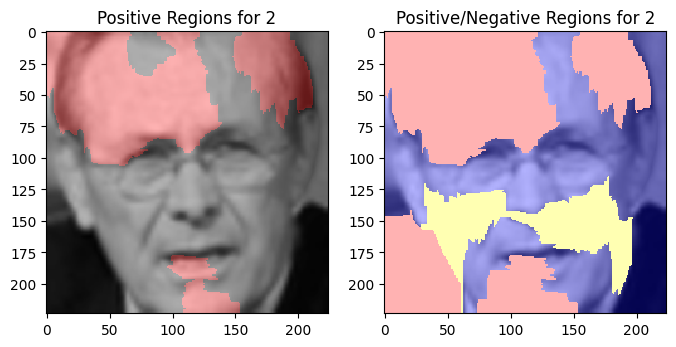

In [ ]:
from skimage.color import label2rgb
temp, mask = explanation.get_image_and_mask(y_test[0], positive_only=True, num_features=5, hide_rest=False)
tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8, 4))
ax1.imshow(label2rgb(mask,tempp, bg_label = 0), interpolation = 'nearest')
ax1.set_title('Positive Regions for {}'.format(y_test[0]))
temp, mask = explanation.get_image_and_mask(y_test[0], positive_only=False, num_features=10, hide_rest=False)
tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
ax2.imshow(label2rgb(3-mask,tempp, bg_label = 0), interpolation = 'nearest')
ax2.set_title('Positive/Negative Regions for {}'.format(y_test[0]))

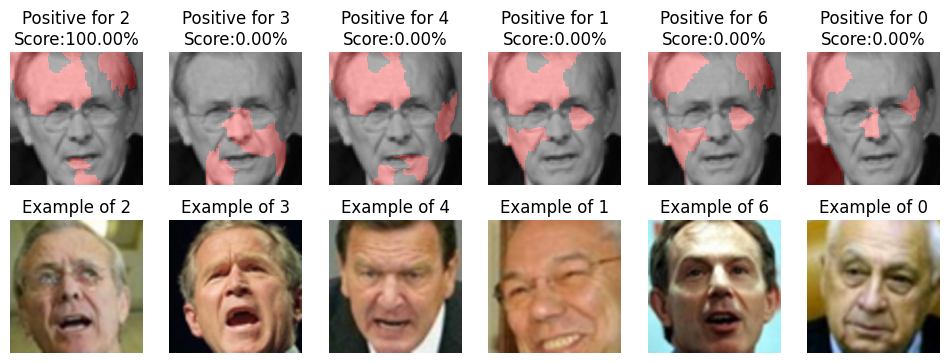

In [ ]:
# now show them for each class
fig, m_axs = plt.subplots(2,6, figsize = (12,4))
for i, (c_ax, gt_ax) in zip(explanation.top_labels, m_axs.T):
    temp, mask = explanation.get_image_and_mask(i, positive_only=True, num_features=5, hide_rest=False, min_weight =0.004)
    tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
    c_ax.imshow(label2rgb(mask,tempp, bg_label = 0), interpolation = 'nearest')
    c_ax.set_title('Positive for {}\nScore:{:2.2f}%'.format(i, 100*pipe_pred_prop[0, i]))
    c_ax.axis('off')
    face_id = np.random.choice(np.where(y_train==i)[0])
    X_train[face_id] = np.interp(X_train[face_id], (X_train[face_id].min(), X_train[face_id].max()), (0, +1))
    gt_ax.imshow(X_train[face_id])
    gt_ax.set_title('Example of {}'.format(i))
    gt_ax.axis('off')

In [ ]:
explanation = explainer.explain_instance(X_test[1], alexnet.predict,
                                         top_labels=6, hide_color=0,
                                         num_samples=10000,
                                         distance_metric='cosine')

  0%|          | 0/10000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


Text(0.5, 1.0, 'Positive/Negative Regions for 0')

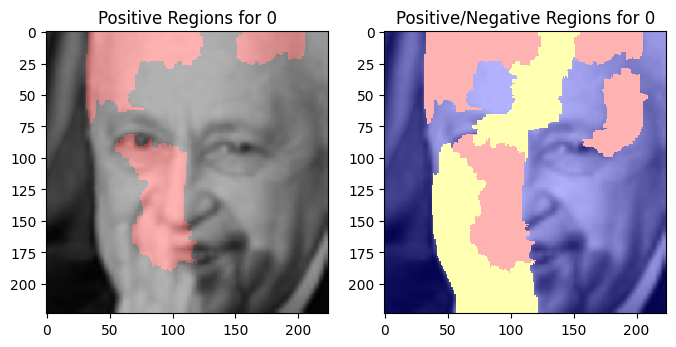

In [ ]:
from skimage.color import label2rgb
temp, mask = explanation.get_image_and_mask(y_test[1], positive_only=True, num_features=5, hide_rest=False)
tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8, 4))
ax1.imshow(label2rgb(mask,tempp, bg_label = 0), interpolation = 'nearest')
ax1.set_title('Positive Regions for {}'.format(y_test[1]))
temp, mask = explanation.get_image_and_mask(y_test[1], positive_only=False, num_features=10, hide_rest=False)
tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
ax2.imshow(label2rgb(3-mask,tempp, bg_label = 0), interpolation = 'nearest')
ax2.set_title('Positive/Negative Regions for {}'.format(y_test[1]))

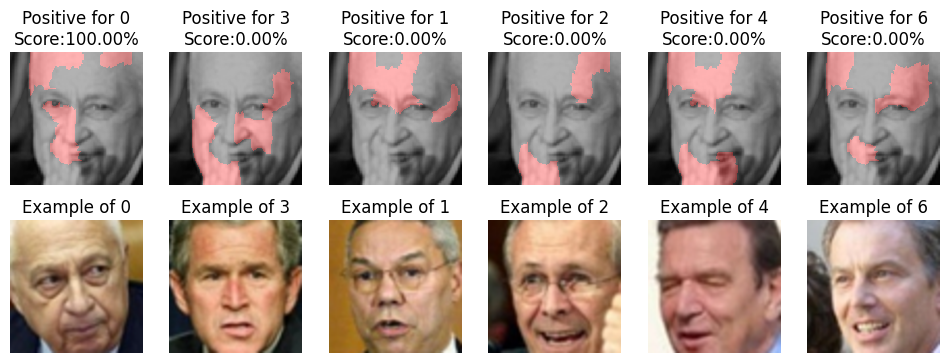

In [ ]:
# now show them for each class
fig, m_axs = plt.subplots(2,6, figsize = (12,4))
for i, (c_ax, gt_ax) in zip(explanation.top_labels, m_axs.T):
    temp, mask = explanation.get_image_and_mask(i, positive_only=True, num_features=5, hide_rest=False, min_weight =0.01)
    tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
    c_ax.imshow(label2rgb(mask,tempp, bg_label = 0), interpolation = 'nearest')
    c_ax.set_title('Positive for {}\nScore:{:2.2f}%'.format(i, 100*pipe_pred_prop[1, i]))
    c_ax.axis('off')
    face_id = np.random.choice(np.where(y_train==i)[0])
    X_train[face_id] = np.interp(X_train[face_id], (X_train[face_id].min(), X_train[face_id].max()), (0, +1))
    gt_ax.imshow(X_train[face_id])
    gt_ax.set_title('Example of {}'.format(i))
    gt_ax.axis('off')

In [ ]:
explanation = explainer.explain_instance(X_test[2], alexnet.predict,
                                         top_labels=6, hide_color=0,
                                         num_samples=1000,
                                         distance_metric='cosine')

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


In [ ]:
y_test[12]

3

Text(0.5, 1.0, 'Positive/Negative Regions for 1')

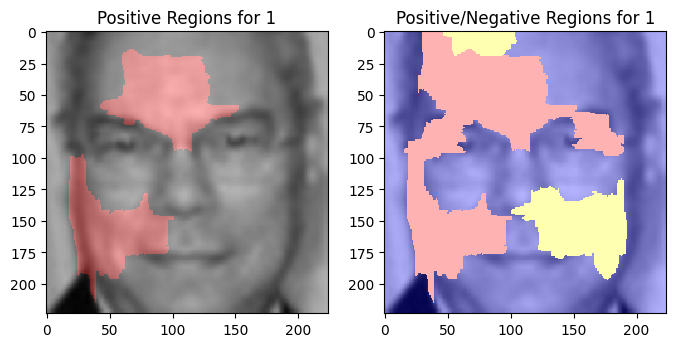

In [ ]:
from skimage.color import label2rgb
temp, mask = explanation.get_image_and_mask(y_test[2], positive_only=True, num_features=5, hide_rest=False)
tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8, 4))
ax1.imshow(label2rgb(mask,tempp, bg_label = 0), interpolation = 'nearest')
ax1.set_title('Positive Regions for {}'.format(y_test[2]))
temp, mask = explanation.get_image_and_mask(y_test[2], positive_only=False, num_features=10, hide_rest=False)
tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
ax2.imshow(label2rgb(3-mask,tempp, bg_label = 0), interpolation = 'nearest')
ax2.set_title('Positive/Negative Regions for {}'.format(y_test[2]))

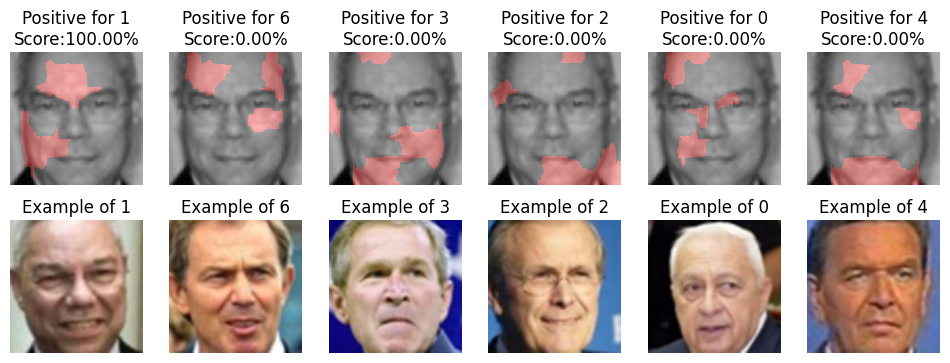

In [ ]:
# now show them for each class
fig, m_axs = plt.subplots(2,6, figsize = (12,4))
for i, (c_ax, gt_ax) in zip(explanation.top_labels, m_axs.T):
    temp, mask = explanation.get_image_and_mask(i, positive_only=True, num_features=5, hide_rest=False, min_weight =0.005)
    tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
    c_ax.imshow(label2rgb(mask,tempp, bg_label = 0), interpolation = 'nearest')
    c_ax.set_title('Positive for {}\nScore:{:2.2f}%'.format(i, 100*pipe_pred_prop[2, i]))
    c_ax.axis('off')
    face_id = np.random.choice(np.where(y_train==i)[0])
    X_train[face_id] = np.interp(X_train[face_id], (X_train[face_id].min(), X_train[face_id].max()), (0, +1))
    gt_ax.imshow(X_train[face_id])
    gt_ax.set_title('Example of {}'.format(i))
    gt_ax.axis('off')

In [ ]:
explanation = explainer.explain_instance(X_test[3], alexnet.predict,
                                         top_labels=6, hide_color=0,
                                         num_samples=10000,
                                         distance_metric='cosine')

  0%|          | 0/10000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 49ms/step


Text(0.5, 1.0, 'Positive/Negative Regions for 3')

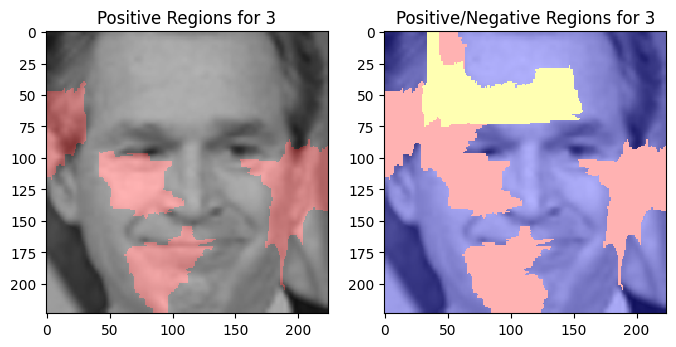

In [ ]:
from skimage.color import label2rgb
temp, mask = explanation.get_image_and_mask(y_test[3], positive_only=True, num_features=5, hide_rest=False)
tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8, 4))
ax1.imshow(label2rgb(mask,tempp, bg_label = 0), interpolation = 'nearest')
ax1.set_title('Positive Regions for {}'.format(y_test[3]))
temp, mask = explanation.get_image_and_mask(y_test[3], positive_only=False, num_features=10, hide_rest=False)
tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
ax2.imshow(label2rgb(3-mask,tempp, bg_label = 0), interpolation = 'nearest')
ax2.set_title('Positive/Negative Regions for {}'.format(y_test[3]))

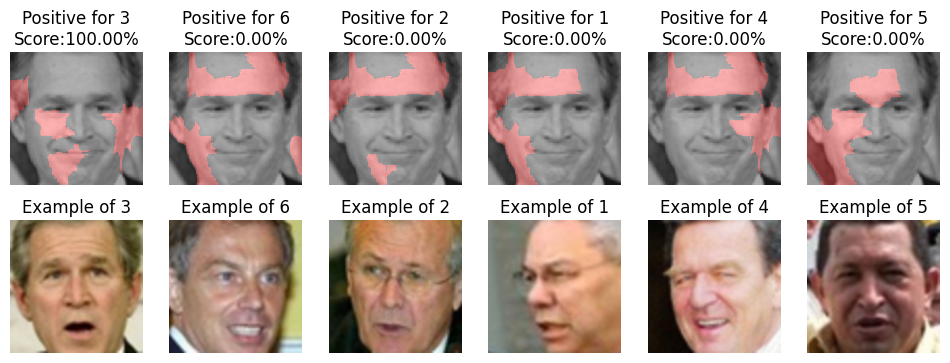

In [ ]:
# now show them for each class
fig, m_axs = plt.subplots(2,6, figsize = (12,4))
for i, (c_ax, gt_ax) in zip(explanation.top_labels, m_axs.T):
    temp, mask = explanation.get_image_and_mask(i, positive_only=True, num_features=5, hide_rest=False, min_weight=0.007)
    tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
    c_ax.imshow(label2rgb(mask,tempp, bg_label = 0), interpolation = 'nearest')
    c_ax.set_title('Positive for {}\nScore:{:2.2f}%'.format(i, 100*pipe_pred_prop[3, i]))
    c_ax.axis('off')
    face_id = np.random.choice(np.where(y_train==i)[0])
    X_train[face_id] = np.interp(X_train[face_id], (X_train[face_id].min(), X_train[face_id].max()), (0, +1))
    gt_ax.imshow(X_train[face_id])
    gt_ax.set_title('Example of {}'.format(i))
    gt_ax.axis('off')

In [ ]:
explanation = explainer.explain_instance(X_test[4], alexnet.predict,
                                         top_labels=6, hide_color=0,
                                         num_samples=1000,
                                         distance_metric='cosine')

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


Text(0.5, 1.0, 'Positive/Negative Regions for 3')

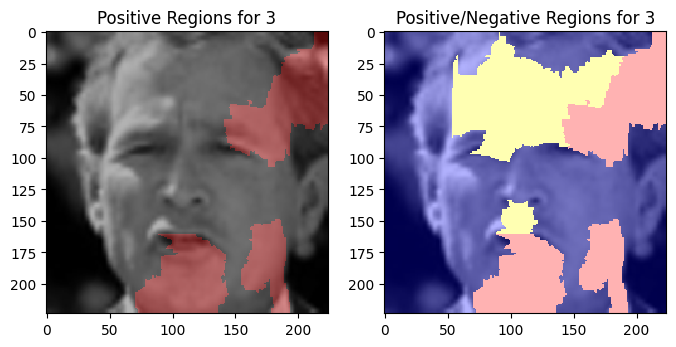

In [ ]:
from skimage.color import label2rgb
temp, mask = explanation.get_image_and_mask(y_test[4], positive_only=True, num_features=5, hide_rest=False)
tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8, 4))
ax1.imshow(label2rgb(mask,tempp, bg_label = 0), interpolation = 'nearest')
ax1.set_title('Positive Regions for {}'.format(y_test[4]))
temp, mask = explanation.get_image_and_mask(y_test[4], positive_only=False, num_features=10, hide_rest=False)
tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
ax2.imshow(label2rgb(3-mask,tempp, bg_label = 0), interpolation = 'nearest')
ax2.set_title('Positive/Negative Regions for {}'.format(y_test[4]))

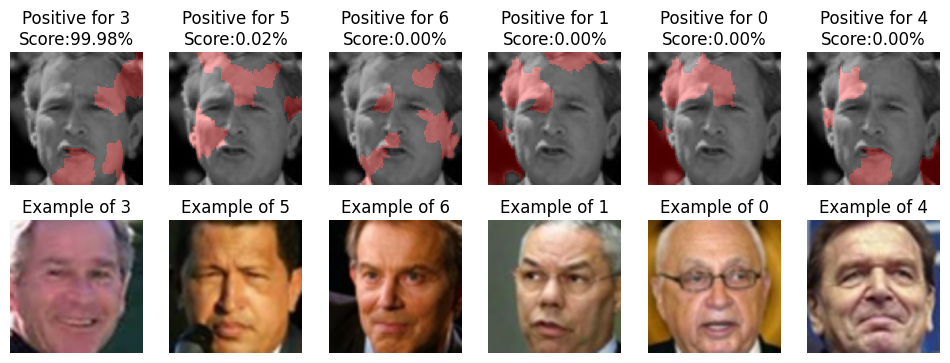

In [ ]:
# now show them for each class
fig, m_axs = plt.subplots(2,6, figsize = (12,4))
for i, (c_ax, gt_ax) in zip(explanation.top_labels, m_axs.T):
    temp, mask = explanation.get_image_and_mask(i, positive_only=True, num_features=5, hide_rest=False, min_weight=0.005)
    tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
    c_ax.imshow(label2rgb(mask,tempp, bg_label = 0), interpolation = 'nearest')
    c_ax.set_title('Positive for {}\nScore:{:2.2f}%'.format(i, 100*pipe_pred_prop[4, i]))
    c_ax.axis('off')
    face_id = np.random.choice(np.where(y_train==i)[0])
    X_train[face_id] = np.interp(X_train[face_id], (X_train[face_id].min(), X_train[face_id].max()), (0, +1))
    gt_ax.imshow(X_train[face_id])
    gt_ax.set_title('Example of {}'.format(i))
    gt_ax.axis('off')

In [ ]:
explanation = explainer.explain_instance(X_test[5], alexnet.predict,
                                         top_labels=6, hide_color=0,
                                         num_samples=1000,
                                         distance_metric='cosine')

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


Text(0.5, 1.0, 'Positive/Negative Regions for 6')

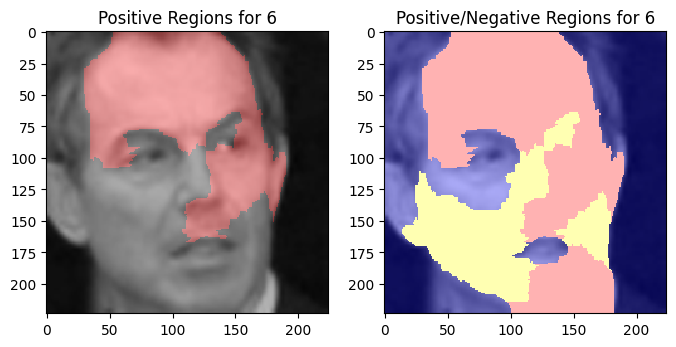

In [ ]:
from skimage.color import label2rgb
temp, mask = explanation.get_image_and_mask(y_test[5], positive_only=True, num_features=5, hide_rest=False)
tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8, 4))
ax1.imshow(label2rgb(mask,tempp, bg_label = 0), interpolation = 'nearest')
ax1.set_title('Positive Regions for {}'.format(y_test[5]))
temp, mask = explanation.get_image_and_mask(y_test[5], positive_only=False, num_features=10, hide_rest=False)
tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
ax2.imshow(label2rgb(3-mask,tempp, bg_label = 0), interpolation = 'nearest')
ax2.set_title('Positive/Negative Regions for {}'.format(y_test[5]))

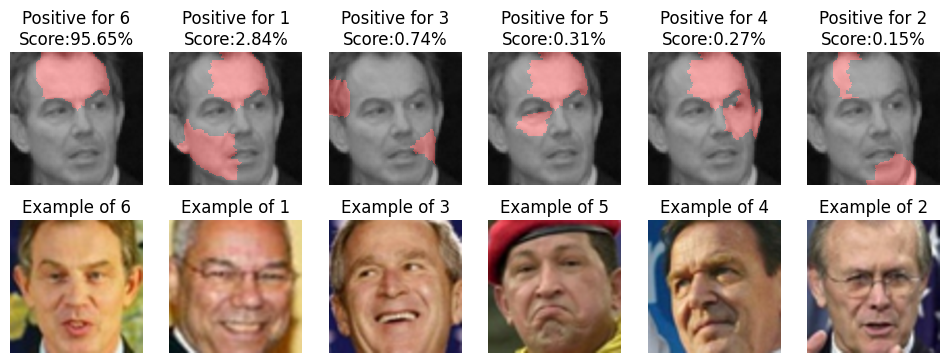

In [ ]:
# now show them for each class
fig, m_axs = plt.subplots(2,6, figsize = (12,4))
for i, (c_ax, gt_ax) in zip(explanation.top_labels, m_axs.T):
    temp, mask = explanation.get_image_and_mask(i, positive_only=True, num_features=2, hide_rest=False, min_weight=0.01)
    tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
    c_ax.imshow(label2rgb(mask,tempp, bg_label = 0), interpolation = 'nearest')
    c_ax.set_title('Positive for {}\nScore:{:2.2f}%'.format(i, 100*pipe_pred_prop[5, i]))
    c_ax.axis('off')
    face_id = np.random.choice(np.where(y_train==i)[0])
    X_train[face_id] = np.interp(X_train[face_id], (X_train[face_id].min(), X_train[face_id].max()), (0, +1))
    gt_ax.imshow(X_train[face_id])
    gt_ax.set_title('Example of {}'.format(i))
    gt_ax.axis('off')

In [ ]:
explanation = explainer.explain_instance(X_test[6], alexnet.predict,
                                         top_labels=6, hide_color=0,
                                         num_samples=1000,
                                         distance_metric='cosine')

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


Text(0.5, 1.0, 'Positive/Negative Regions for 3')

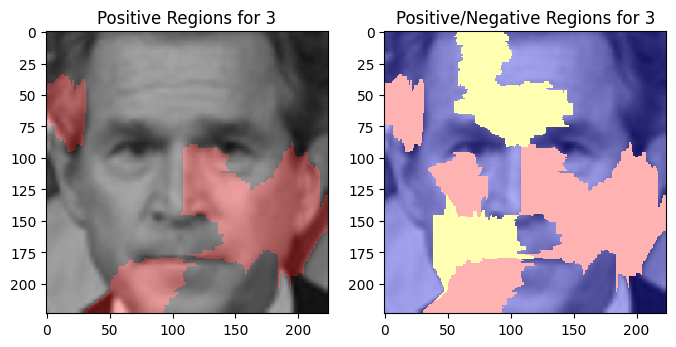

In [ ]:
from skimage.color import label2rgb
temp, mask = explanation.get_image_and_mask(y_test[6], positive_only=True, num_features=5, hide_rest=False)
tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8, 4))
ax1.imshow(label2rgb(mask,tempp, bg_label = 0), interpolation = 'nearest')
ax1.set_title('Positive Regions for {}'.format(y_test[6]))
temp, mask = explanation.get_image_and_mask(y_test[6], positive_only=False, num_features=10, hide_rest=False)
tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
ax2.imshow(label2rgb(3-mask,tempp, bg_label = 0), interpolation = 'nearest')
ax2.set_title('Positive/Negative Regions for {}'.format(y_test[6]))

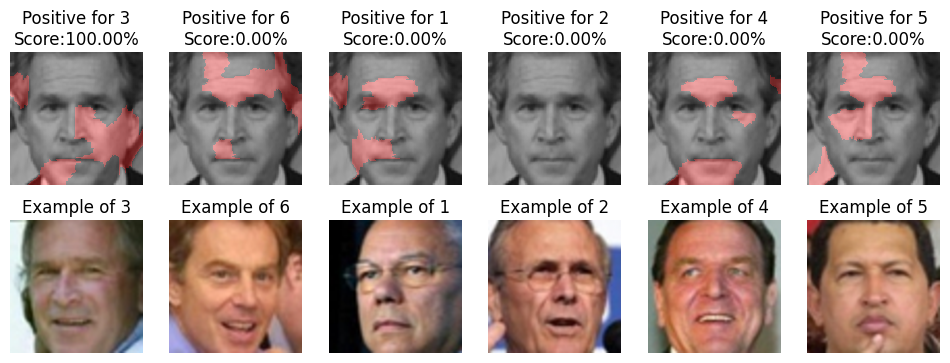

In [ ]:
# now show them for each class
fig, m_axs = plt.subplots(2,6, figsize = (12,4))
for i, (c_ax, gt_ax) in zip(explanation.top_labels, m_axs.T):
    temp, mask = explanation.get_image_and_mask(i, positive_only=True, num_features=5, hide_rest=False, min_weight=0.01)
    tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
    c_ax.imshow(label2rgb(mask,tempp, bg_label = 0), interpolation = 'nearest')
    c_ax.set_title('Positive for {}\nScore:{:2.2f}%'.format(i, 100*pipe_pred_prop[6, i]))
    c_ax.axis('off')
    face_id = np.random.choice(np.where(y_train==i)[0])
    X_train[face_id] = np.interp(X_train[face_id], (X_train[face_id].min(), X_train[face_id].max()), (0, +1))
    gt_ax.imshow(X_train[face_id])
    gt_ax.set_title('Example of {}'.format(i))
    gt_ax.axis('off')

In [ ]:
explanation = explainer.explain_instance(X_test[7], alexnet.predict,
                                         top_labels=6, hide_color=0,
                                         num_samples=1000,
                                         distance_metric='cosine')

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


Text(0.5, 1.0, 'Positive/Negative Regions for 4')

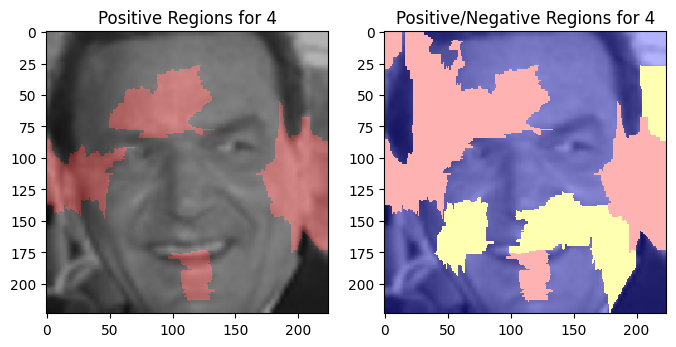

In [ ]:
from skimage.color import label2rgb
temp, mask = explanation.get_image_and_mask(y_test[7], positive_only=True, num_features=5, hide_rest=False)
tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8, 4))
ax1.imshow(label2rgb(mask,tempp, bg_label = 0), interpolation = 'nearest')
ax1.set_title('Positive Regions for {}'.format(y_test[7]))
temp, mask = explanation.get_image_and_mask(y_test[7], positive_only=False, num_features=10, hide_rest=False)
tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
ax2.imshow(label2rgb(3-mask,tempp, bg_label = 0), interpolation = 'nearest')
ax2.set_title('Positive/Negative Regions for {}'.format(y_test[7]))

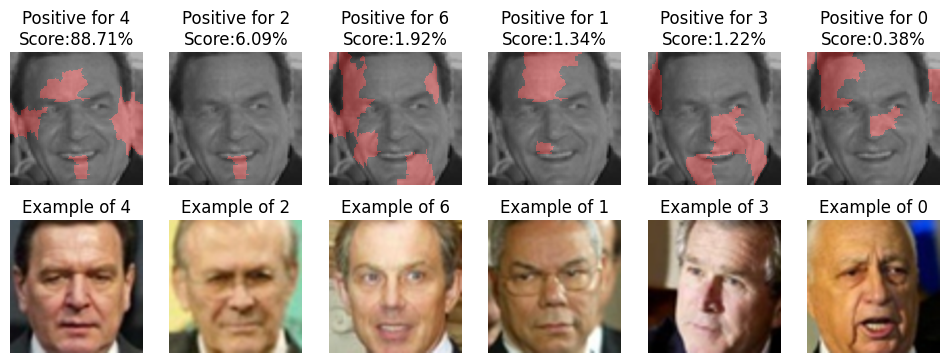

In [ ]:
# now show them for each class
fig, m_axs = plt.subplots(2,6, figsize = (12,4))
for i, (c_ax, gt_ax) in zip(explanation.top_labels, m_axs.T):
    temp, mask = explanation.get_image_and_mask(i, positive_only=True, num_features=5, hide_rest=False, min_weight=0.01)
    tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
    c_ax.imshow(label2rgb(mask,tempp, bg_label = 0), interpolation = 'nearest')
    c_ax.set_title('Positive for {}\nScore:{:2.2f}%'.format(i, 100*pipe_pred_prop[7, i]))
    c_ax.axis('off')
    face_id = np.random.choice(np.where(y_train==i)[0])
    X_train[face_id] = np.interp(X_train[face_id], (X_train[face_id].min(), X_train[face_id].max()), (0, +1))
    gt_ax.imshow(X_train[face_id])
    gt_ax.set_title('Example of {}'.format(i))
    gt_ax.axis('off')

In [ ]:
explanation = explainer.explain_instance(X_test[8], alexnet.predict,
                                         top_labels=6, hide_color=0,
                                         num_samples=1000,
                                         distance_metric='cosine')

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


Text(0.5, 1.0, 'Positive/Negative Regions for 1')

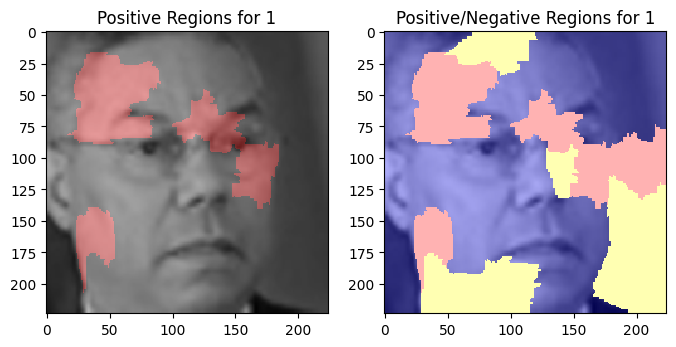

In [ ]:
from skimage.color import label2rgb
temp, mask = explanation.get_image_and_mask(y_test[8], positive_only=True, num_features=5, hide_rest=False)
tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8, 4))
ax1.imshow(label2rgb(mask,tempp, bg_label = 0), interpolation = 'nearest')
ax1.set_title('Positive Regions for {}'.format(y_test[8]))
temp, mask = explanation.get_image_and_mask(y_test[8], positive_only=False, num_features=10, hide_rest=False)
tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
ax2.imshow(label2rgb(3-mask,tempp, bg_label = 0), interpolation = 'nearest')
ax2.set_title('Positive/Negative Regions for {}'.format(y_test[8]))

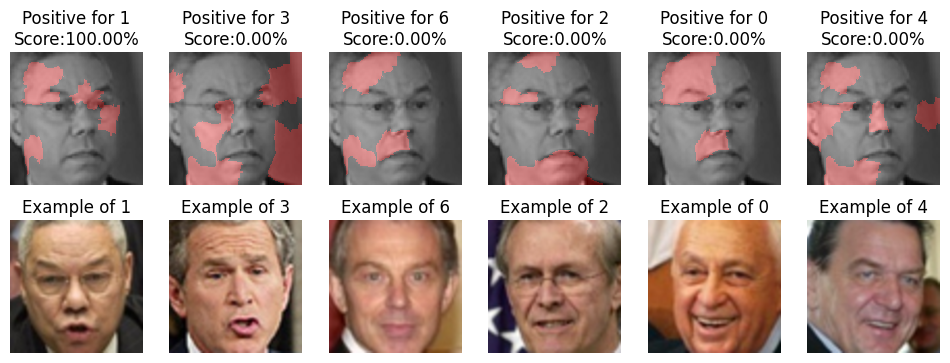

In [ ]:
# now show them for each class
fig, m_axs = plt.subplots(2,6, figsize = (12,4))
for i, (c_ax, gt_ax) in zip(explanation.top_labels, m_axs.T):
    temp, mask = explanation.get_image_and_mask(i, positive_only=True, num_features=5, hide_rest=False, min_weight=0.003)
    tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
    c_ax.imshow(label2rgb(mask,tempp, bg_label = 0), interpolation = 'nearest')
    c_ax.set_title('Positive for {}\nScore:{:2.2f}%'.format(i, 100*pipe_pred_prop[8, i]))
    c_ax.axis('off')
    face_id = np.random.choice(np.where(y_train==i)[0])
    X_train[face_id] = np.interp(X_train[face_id], (X_train[face_id].min(), X_train[face_id].max()), (0, +1))
    gt_ax.imshow(X_train[face_id])
    gt_ax.set_title('Example of {}'.format(i))
    gt_ax.axis('off')

In [ ]:
explanation = explainer.explain_instance(X_test[9], alexnet.predict,
                                         top_labels=6, hide_color=0,
                                         num_samples=1000,
                                         distance_metric='cosine')

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


Text(0.5, 1.0, 'Positive/Negative Regions for 3')

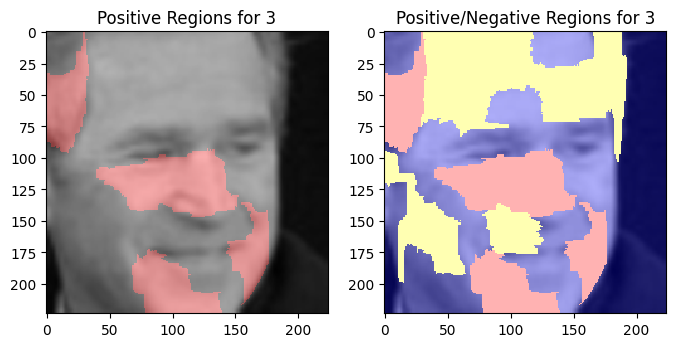

In [ ]:
from skimage.color import label2rgb
temp, mask = explanation.get_image_and_mask(y_test[9], positive_only=True, num_features=5, hide_rest=False)
tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8, 4))
ax1.imshow(label2rgb(mask,tempp, bg_label = 0), interpolation = 'nearest')
ax1.set_title('Positive Regions for {}'.format(y_test[9]))
temp, mask = explanation.get_image_and_mask(y_test[9], positive_only=False, num_features=10, hide_rest=False)
tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
ax2.imshow(label2rgb(3-mask,tempp, bg_label = 0), interpolation = 'nearest')
ax2.set_title('Positive/Negative Regions for {}'.format(y_test[9]))

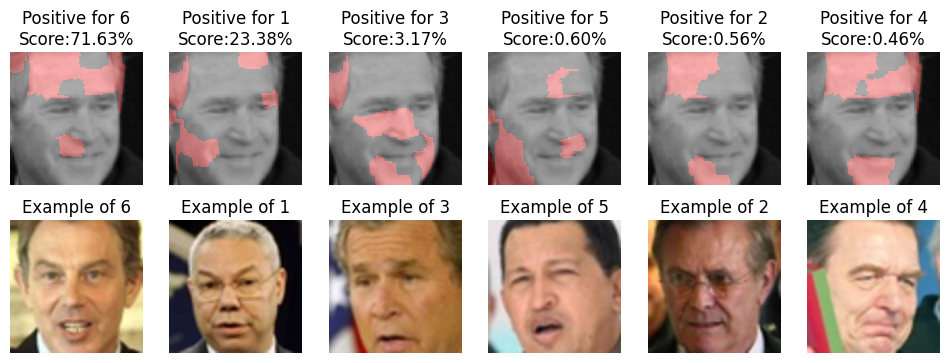

In [ ]:
# now show them for each class
fig, m_axs = plt.subplots(2,6, figsize = (12,4))
for i, (c_ax, gt_ax) in zip(explanation.top_labels, m_axs.T):
    temp, mask = explanation.get_image_and_mask(i, positive_only=True, num_features=5, hide_rest=False, min_weight=0.025)
    tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
    c_ax.imshow(label2rgb(mask,tempp, bg_label = 0), interpolation = 'nearest')
    c_ax.set_title('Positive for {}\nScore:{:2.2f}%'.format(i, 100*pipe_pred_prop[9, i]))
    c_ax.axis('off')
    face_id = np.random.choice(np.where(y_train==i)[0])
    X_train[face_id] = np.interp(X_train[face_id], (X_train[face_id].min(), X_train[face_id].max()), (0, +1))
    gt_ax.imshow(X_train[face_id])
    gt_ax.set_title('Example of {}'.format(i))
    gt_ax.axis('off')

In [ ]:
explanation = explainer.explain_instance(X_test[10], alexnet.predict,
                                         top_labels=6, hide_color=0,
                                         num_samples=1000,
                                         distance_metric='cosine')

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


Text(0.5, 1.0, 'Positive/Negative Regions for 3')

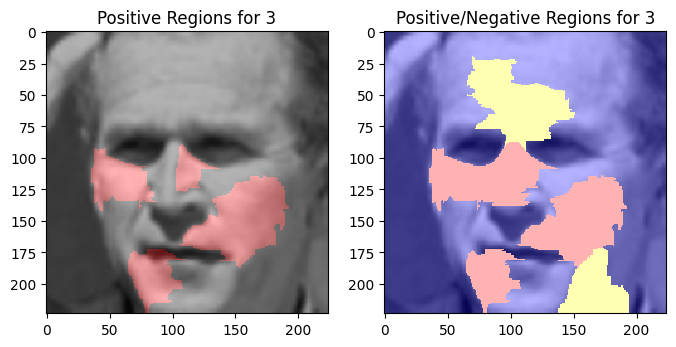

In [ ]:
from skimage.color import label2rgb
temp, mask = explanation.get_image_and_mask(y_test[10], positive_only=True, num_features=5, hide_rest=False)
tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8, 4))
ax1.imshow(label2rgb(mask,tempp, bg_label = 0), interpolation = 'nearest')
ax1.set_title('Positive Regions for {}'.format(y_test[10]))
temp, mask = explanation.get_image_and_mask(y_test[10], positive_only=False, num_features=10, hide_rest=False)
tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
ax2.imshow(label2rgb(3-mask,tempp, bg_label = 0), interpolation = 'nearest')
ax2.set_title('Positive/Negative Regions for {}'.format(y_test[10]))

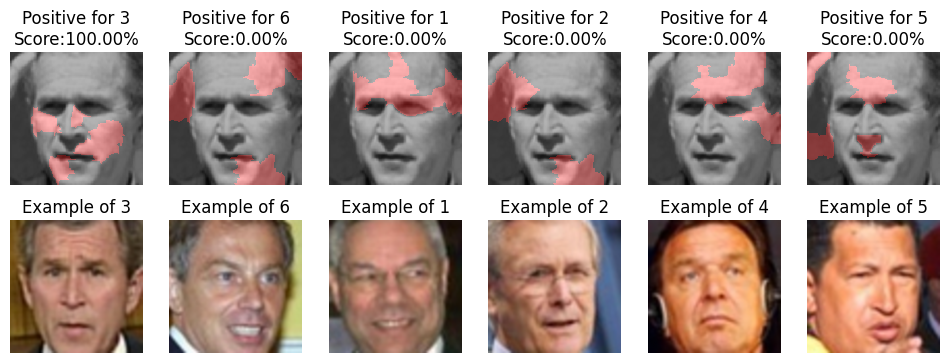

In [ ]:
# now show them for each class
fig, m_axs = plt.subplots(2,6, figsize = (12,4))
for i, (c_ax, gt_ax) in zip(explanation.top_labels, m_axs.T):
    temp, mask = explanation.get_image_and_mask(i, positive_only=True, num_features=5, hide_rest=False, min_weight=0.01)
    tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
    c_ax.imshow(label2rgb(mask,tempp, bg_label = 0), interpolation = 'nearest')
    c_ax.set_title('Positive for {}\nScore:{:2.2f}%'.format(i, 100*pipe_pred_prop[10, i]))
    c_ax.axis('off')
    face_id = np.random.choice(np.where(y_train==i)[0])
    X_train[face_id] = np.interp(X_train[face_id], (X_train[face_id].min(), X_train[face_id].max()), (0, +1))
    gt_ax.imshow(X_train[face_id])
    gt_ax.set_title('Example of {}'.format(i))
    gt_ax.axis('off')

In [ ]:
explanation = explainer.explain_instance(X_test[28], alexnet.predict,
                                         top_labels=6, hide_color=0,
                                         num_samples=1000,
                                         distance_metric='cosine')

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


Text(0.5, 1.0, 'Positive/Negative Regions for 2')

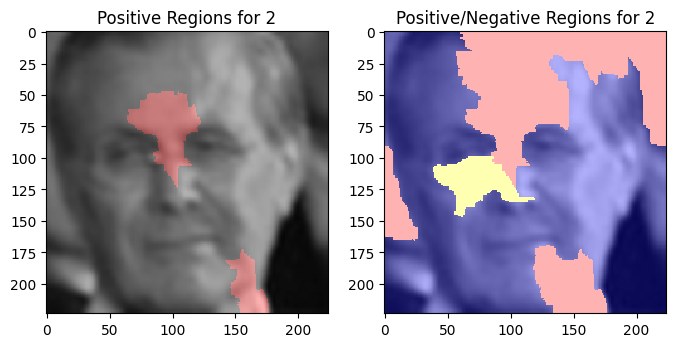

In [ ]:
from skimage.color import label2rgb
temp, mask = explanation.get_image_and_mask(y_test[28], positive_only=True, num_features=2, hide_rest=False)
tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8, 4))
ax1.imshow(label2rgb(mask,tempp, bg_label = 0), interpolation = 'nearest')
ax1.set_title('Positive Regions for {}'.format(y_test[28]))
temp, mask = explanation.get_image_and_mask(y_test[28], positive_only=False, num_features=10, hide_rest=False)
tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
ax2.imshow(label2rgb(3-mask,tempp, bg_label = 0), interpolation = 'nearest')
ax2.set_title('Positive/Negative Regions for {}'.format(y_test[28]))

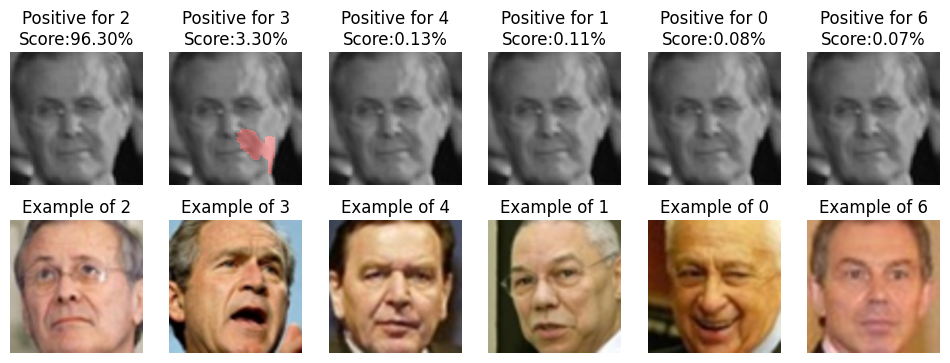

In [ ]:
# now show them for each class
fig, m_axs = plt.subplots(2,6, figsize = (12,4))
for i, (c_ax, gt_ax) in zip(explanation.top_labels, m_axs.T):
    temp, mask = explanation.get_image_and_mask(i, positive_only=True, num_features=2, hide_rest=False, min_weight=0.1)
    tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
    c_ax.imshow(label2rgb(mask,tempp, bg_label = 0), interpolation = 'nearest')
    c_ax.set_title('Positive for {}\nScore:{:2.2f}%'.format(i, 100*pipe_pred_prop[28, i]))
    c_ax.axis('off')
    face_id = np.random.choice(np.where(y_train==i)[0])
    X_train[face_id] = np.interp(X_train[face_id], (X_train[face_id].min(), X_train[face_id].max()), (0, +1))
    gt_ax.imshow(X_train[face_id])
    gt_ax.set_title('Example of {}'.format(i))
    gt_ax.axis('off')

In [ ]:
wrong_idx = np.random.choice(np.where(pipe_pred_test!=y_test)[0])

print('Using #{} where the label was {} and the model predicted {}'.format(wrong_idx, y_test[wrong_idx], pipe_pred_test[wrong_idx]))

Using #230 where the label was 0 and the model predicted 1


In [ ]:
explanation = explainer.explain_instance(X_test[wrong_idx], alexnet.predict,
                                         top_labels=6, hide_color=0,
                                         num_samples=1000,
                                         distance_metric='cosine')

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


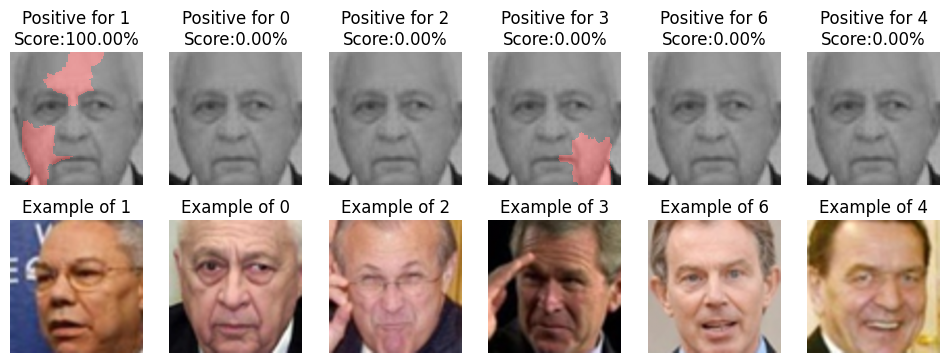

In [ ]:
# now show them for each class
fig, m_axs = plt.subplots(2,6, figsize = (12,4))
for i, (c_ax, gt_ax) in zip(explanation.top_labels, m_axs.T):
    temp, mask = explanation.get_image_and_mask(i, positive_only=True, num_features=2, hide_rest=False, min_weight=0.2)
    tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
    c_ax.imshow(label2rgb(mask,tempp, bg_label = 0), interpolation = 'nearest')
    c_ax.set_title('Positive for {}\nScore:{:2.2f}%'.format(i, 100*pipe_pred_prop[wrong_idx, i]))
    c_ax.axis('off')
    face_id = np.random.choice(np.where(y_train==i)[0])
    X_train[face_id] = np.interp(X_train[face_id], (X_train[face_id].min(), X_train[face_id].max()), (0, +1))
    gt_ax.imshow(X_train[face_id])
    gt_ax.set_title('Example of {}'.format(i))
    gt_ax.axis('off')